# Analyse TED Talks 

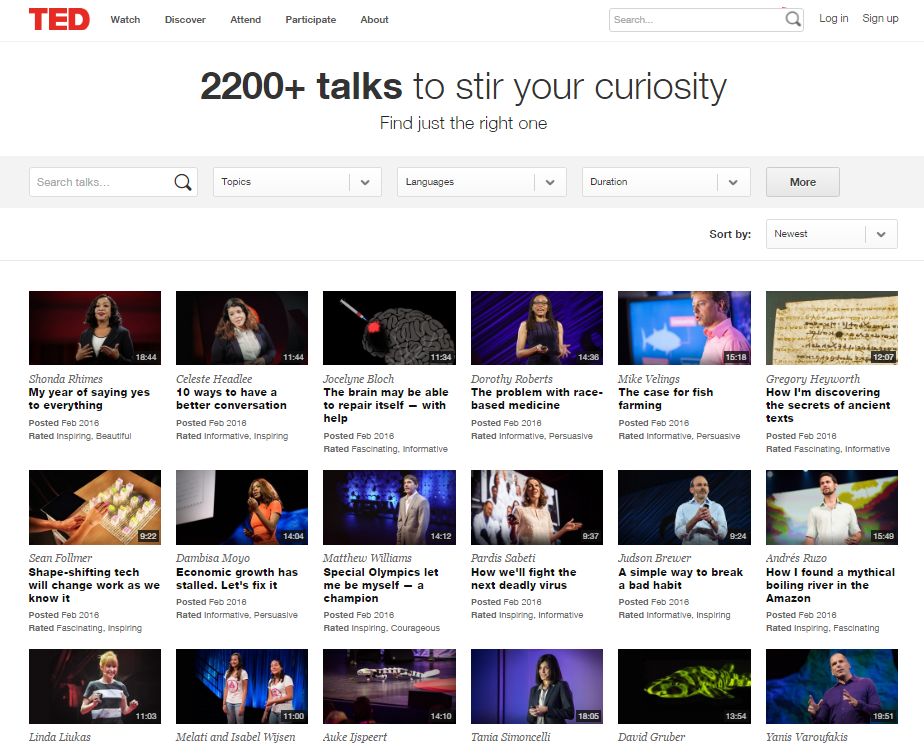

In [35]:
from IPython.display import Image, display
display(Image("Overview.png"))

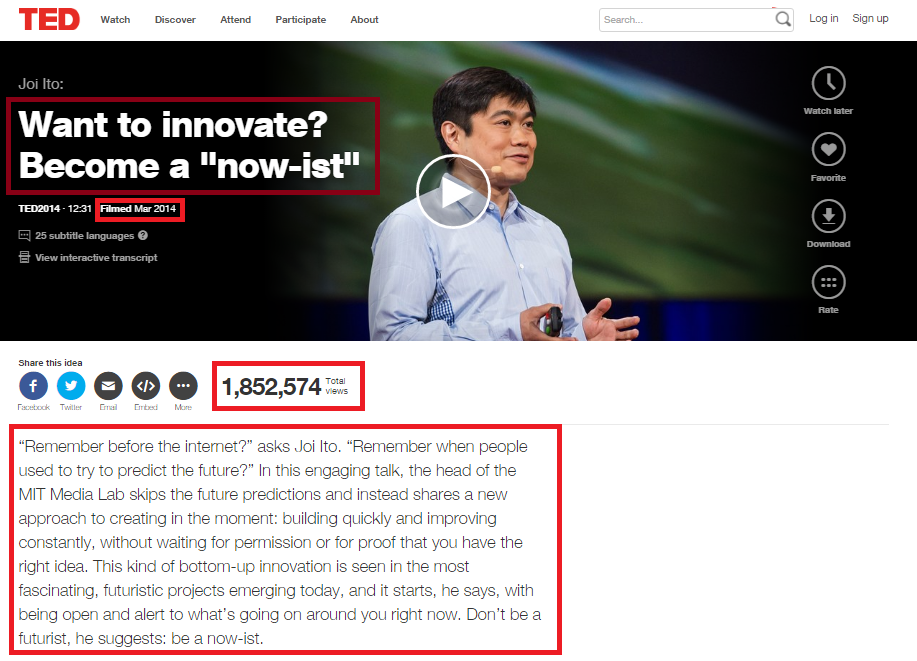

In [36]:
display(Image("Talk1a.png"))

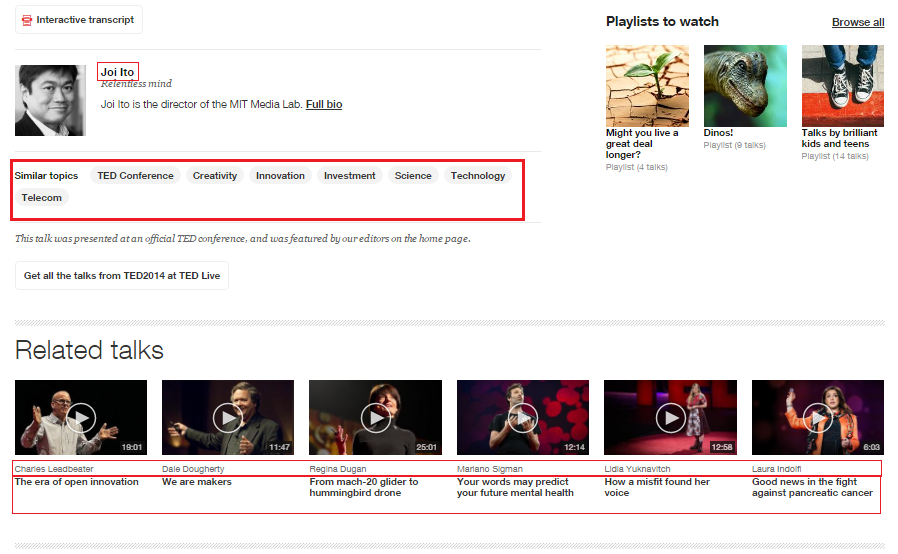

In [37]:
display(Image("Talk1b.png"))

## Scrapen

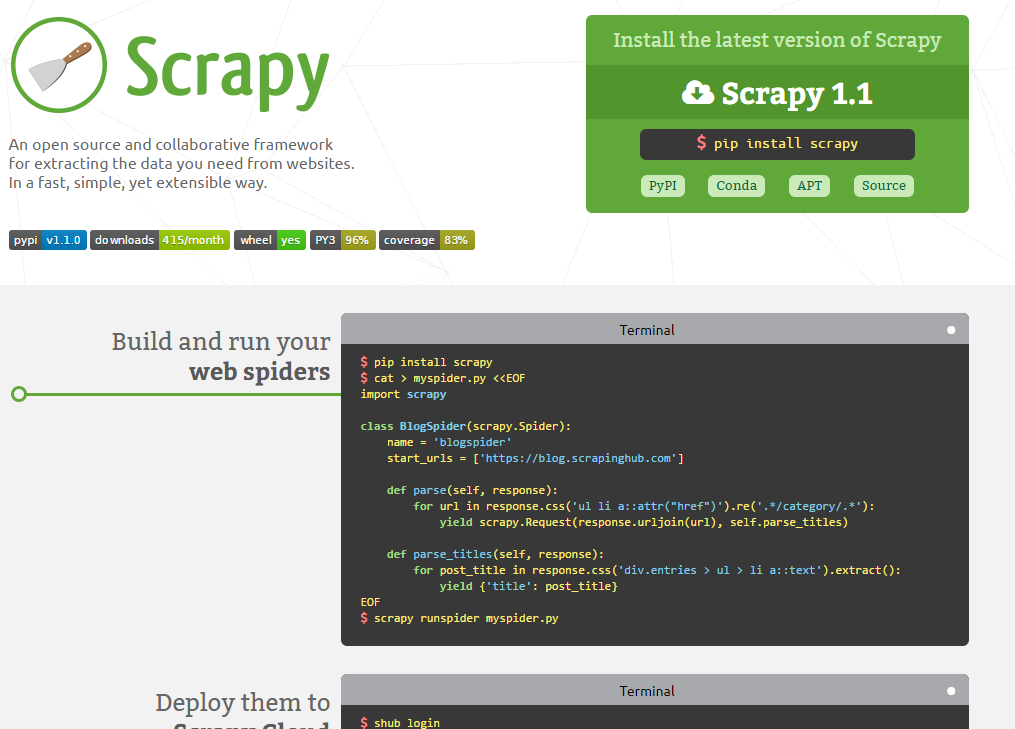

In [38]:
display(Image("Scrapy.png"))

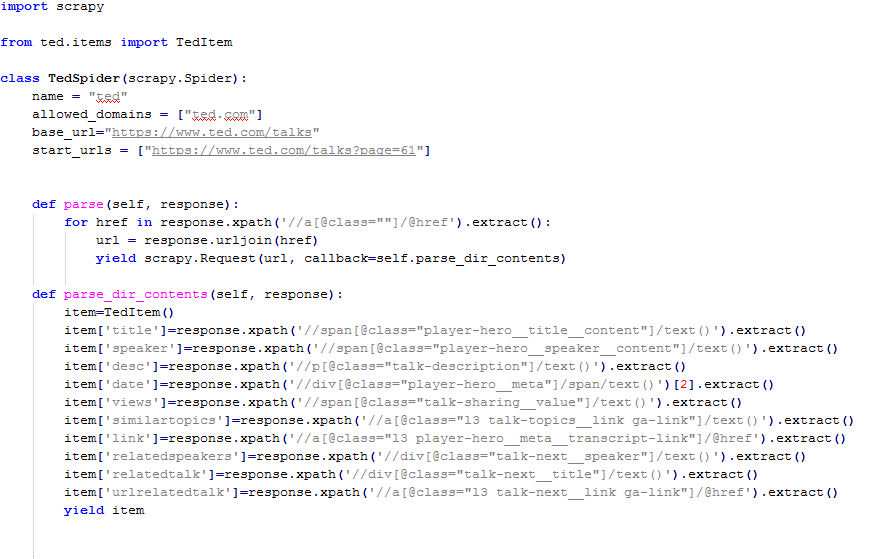

In [39]:
#Spider code
display(Image("Scrapycode.png"))

## Datapreparatie
Van JSON naar pandas DataFrame

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from matplotlib_venn import venn3
matplotlib.style.use('ggplot')
import pandas as pd
import numpy as np
df = pd.read_json('allitems - Copy.json')
df['views'] = df['views'].str.replace(',','')
df=df.fillna(0)
df['views']=df['views'].astype(int)
df['scrapedate'] = "April 2016"
df['scrapedate']=pd.to_datetime(df['scrapedate'])
df['#days online']=(df['scrapedate']-df['date'])/(np.timedelta64(1, 'D'))
df['views per day']=df['views']/df['#days online']
df['similartopics'] = df['similartopics'].apply(tuple)
df['relatedspeakers'] = df['relatedspeakers'].apply(tuple)
df['relatedtalk'] = df['relatedtalk'].apply(tuple)
df=df[['date', 'title','speaker','relatedspeakers', 'relatedtalk', 'similartopics', 'views'
       , 'scrapedate', '#days online', 'views per day', 'desc', 'link', 'urlrelatedtalk']]
df

,date,title,speaker,relatedspeakers,relatedtalk,similartopics,views,scrapedate,#days online,views per day,desc,link,urlrelatedtalk
0,2016-02-01,This country isn't just carbon neutral — it's carbon negative,[Tshering Tobgay:],"(Chip Conley, Mary Robinson, Anote Tong, Dan Gross, Angélica Dass, Alex Kipman)","(Measuring what makes life worthwhile, Why climate change is a threat to human rights, My countr...","(Buddhism, Alternative energy, Beauty, Big problems, Biosphere, Climate change, Democracy, Devel...",635852,2016-04-01,60,10597.533333,"[Deep in the Himalayas, on the border between China and India, lies the Kingdom of Bhutan, which...",[/talks/tshering_tobgay_this_country_isn_t_just_carbon_neutral_it_s_carbon_negative/transcript?l...,"[/talks/chip_conley_measuring_what_makes_life_worthwhile, /talks/mary_robinson_why_climate_chang..."
1,2016-02-01,Why gun violence can't be our new normal,[Dan Gross:],"(Peter van Uhm, Gary Slutkin, Ilona Szabó de Carvalho, Angélica Dass, Alex Kipman, Siyanda Mohut...","(Why I chose a gun, Let's treat violence like a contagious disease , 4 lessons I learned from ta...","(Debate, Guns, Activism, Big problems, Children, Choice, Community, Future, Goal-setting, Govern...",0,2016-04-01,60,0.000000,[It doesn't matter whether you love or hate guns; it's obvious that the US would be a safer plac...,[/talks/dan_gross_why_gun_violence_can_t_be_our_new_normal/transcript?language=en],"[/talks/peter_van_uhm_why_i_chose_a_gun, /talks/gary_slutkin_let_s_treat_violence_like_a_contagi..."
2,2016-02-01,The gospel of doubt,[Casey Gerald:],"(Bryan Stevenson, Lesley Hazleton, Andrew Solomon, Angélica Dass, Siyanda Mohutsiwa, Carol Fishm...","(We need to talk about an injustice, The doubt essential to faith, How the worst moments in our ...","(God, Big problems, Business, Capitalism, Community, Education, Faith, Inequality, Social change...",513521,2016-04-01,60,8558.683333,[What do you do when your firmly held beliefs turn out not to be true? When Casey Gerald's relig...,[/talks/casey_gerald_the_gospel_of_doubt/transcript?language=en],"[/talks/bryan_stevenson_we_need_to_talk_about_an_injustice, /talks/lesley_hazleton_the_doubt_ess..."
3,2016-02-01,Inside the mind of a master procrastinator,[Tim Urban:],"(Shlomo Benartzi, Randall Munroe, James Veitch, Angélica Dass, Alex Kipman, Siyanda Mohutsiwa)","(Saving for tomorrow, tomorrow, Comics that ask ""what if?"", This is what happens when you reply ...","(Internet, Brain, Choice, Comedy, Decision-making, Entertainment, Funny, Goal-setting, Humor, Mi...",1255835,2016-04-01,60,20930.583333,"[Tim Urban knows that procrastination doesn't make sense, but he's never been able to shake his ...",[/talks/tim_urban_inside_the_mind_of_a_master_procrastinator/transcript?language=en],"[/talks/shlomo_benartzi_saving_more_tomorrow, /talks/randall_munroe_comics_that_ask_what_if, /ta..."
4,2016-02-01,How Airbnb designs for trust,[Joe Gebbia:],"(Rachel Botsman, Robin Chase, Travis Kalanick, Angélica Dass, Alex Kipman, Siyanda Mohutsiwa)","(The currency of the new economy is trust, Excuse me, may I rent your car?, Uber's plan to get m...","(Behavioral economics, Business, Collaboration, Community, Culture, Design, Economics, Entrepren...",708956,2016-04-01,60,11815.933333,"[Joe Gebbia, the co-founder of Airbnb, bet his whole company on the belief that people can trust...",[/talks/joe_gebbia_how_airbnb_designs_for_trust/transcript?language=en],"[/talks/rachel_botsman_the_currency_of_the_new_economy_is_trust, /talks/robin_chase_excuse_me_ma..."
5,2016-02-01,A prosecutor's vision for a better justice system,[Adam Foss:],"(Bryan Stevenson, Clint Smith, Alice Goffman, Dan Gross, Angélica Dass, Siyanda Mohutsiwa)","(We need to talk about an injustice, How to raise a black son in America, How we're priming some...","(Criminal Justice, Big problems, Choice, Compassion, Decision-making, Education, Government, Ine...",557083,2016-04-01,60,9284.716667,"[When a kid commits a crime, the US justice 

In [41]:
#Top 20 TED talks met de meeste views per day
pd.set_option('display.max_colwidth',100)
dfnotsorted=df[['title','date','views','views per day']].sort_values('views per day', ascending=False)
dfsorted=dfnotsorted.reset_index(drop=True)
dfsorted.index = np.arange(1,len(df)+1)
dfsorted[:20]

,title,date,views,views per day
1,What makes a good life? Lessons from the longest study on happiness,2015-11-01,7581764,49880.026316
2,This is what happens when you reply to spam email,2015-12-01,5378579,44086.713115
3,My year of saying yes to everything,2016-02-01,1462887,24381.450000
4,Your body language shapes who you are,2012-06-01,32668951,23334.965000
5,Inside the mind of a master procrastinator,2016-02-01,1255835,20930.583333
6,How to stay calm when you know you'll be stressed,2015-09-01,4123027,19356.934272
7,The price of shame,2015-03-01,7594612,19130.005038
8,What the discovery of gravitational waves means,2016-02-01,1133989,18899.816667
9,Meet the dazzling flying machines of the future,2016-02-01,1131158,18852.633333
10,"Teach girls bravery, not perfection",2016-02-01,1114334,18572.233333


## TED talks sinds 1972

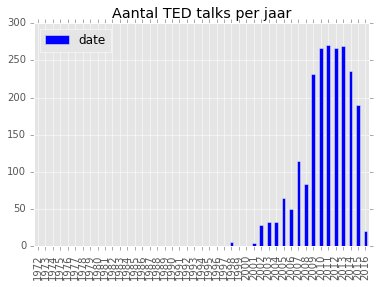

In [42]:
#Aantal TED talks per jaar
dftest=df['date'].value_counts()
df5=dftest.groupby(dftest.index.year).sum()
df6=pd.DataFrame(df5)
df7=df6.reindex(range(1972, 2017, 1), fill_value=0)
plt.figure();
df7.plot.bar().set_title('Aantal TED talks per jaar')


## Populariteit thema's

In [43]:
#Populariteit thema's
df1=df
df1_groups = df1.groupby('similartopics').groups
import collections
d = collections.Counter()
for elem in df1['similartopics'][:3000]:
    c=collections.Counter(elem)
    d=d+c
d1=d.most_common()
d2=pd.DataFrame(d1)
d2.columns = ['Thema', 'Aantal Videos']
d2

,Thema,Aantal Videos
0,TED Conference,708
1,Technology,610
2,Culture,467
3,Science,465
4,Global issues,442
5,Design,363
6,TEDx,358
7,Business,301
8,Entertainment,281
9,Arts,196


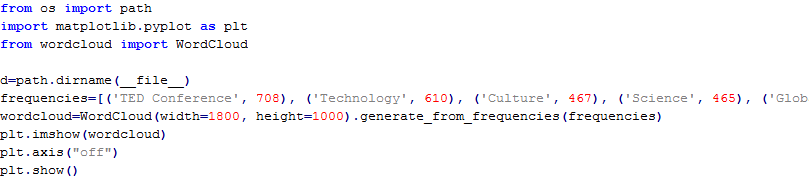

In [44]:
display(Image("Wordcloudcode.png"))

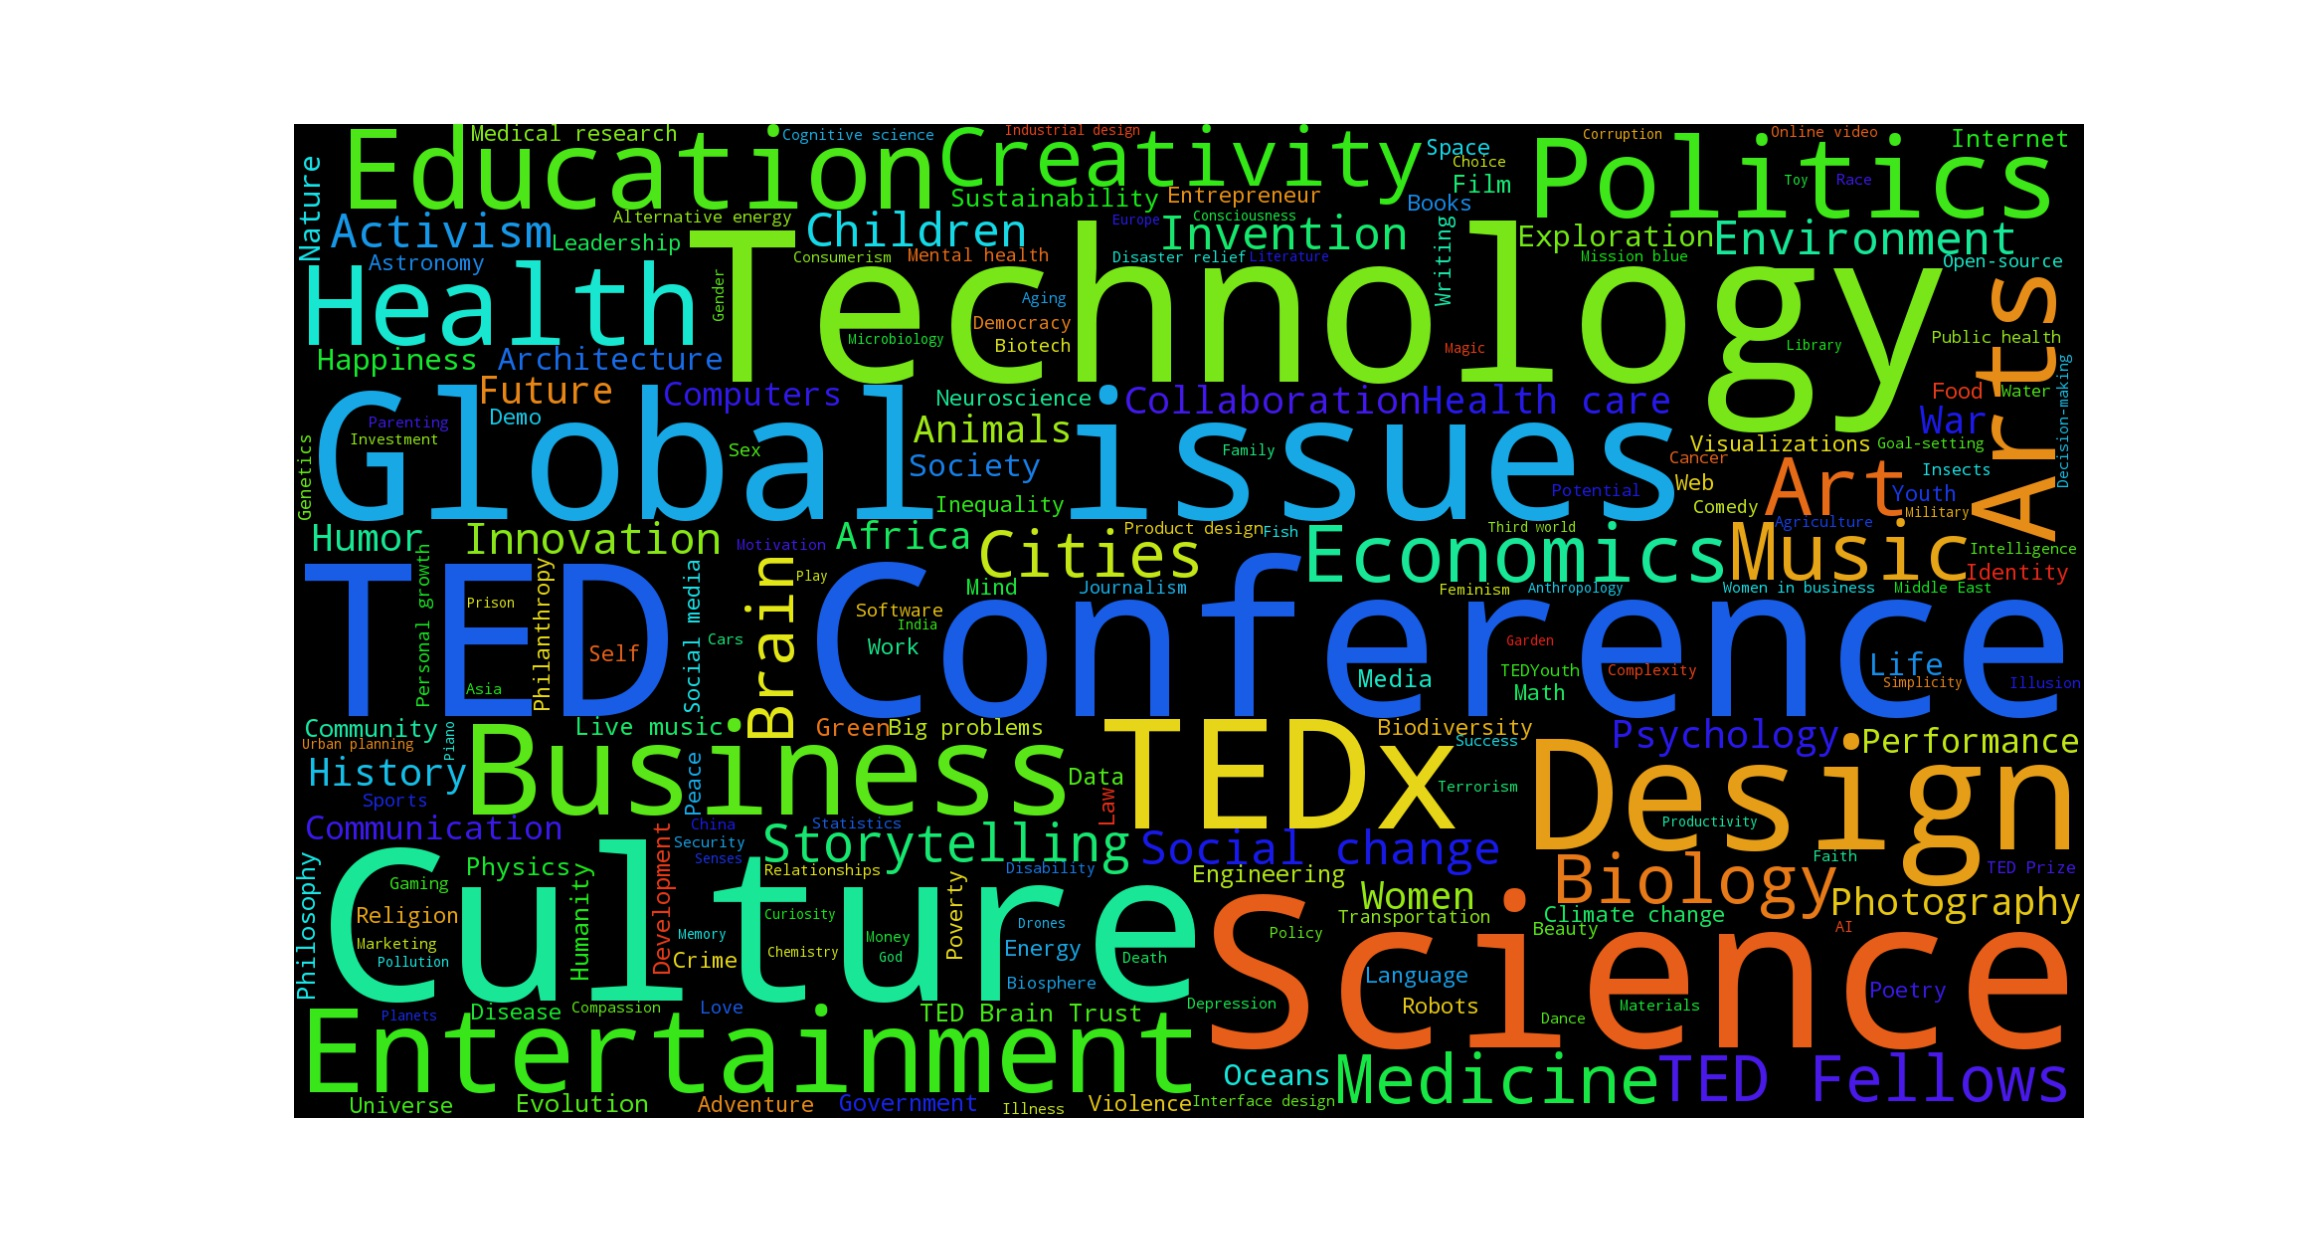

In [45]:
display(Image("wordcloud1.jpg"))

## 5 grootste thema's

In [46]:
df1_groups[(u'Brain',
  u'Cognitive science',
  u'Neuroscience',
  u'Science',
  u'Youth')];

#5 belangrijkste thema's met kleur
importantTopicsAndColors = {
u'Technology': 'blue',
 u'Culture': 'green',
 u'Science': 'red',
 u'Global issues':'cyan',
 u'Design': 'magenta'
# color dictionary:http://stackoverflow.com/questions/22408237/named-colors-in-matplotlib
}
#print importantTopicsAndColors

#Lijst van belangrijke thema's
importantTopics = importantTopicsAndColors.keys()
importantTopics;

In [47]:
#Dictionary met alle video's per thema. De key is het thema, de value is het aantal video's bij het betreffende thema
videosPerTopicDict = {}

#Dictionary bevat alleen de important topics
for topic in importantTopics:
    videosPerTopicDict[topic] = []
for index, row in df.iterrows():
    simTopics = row['similartopics']
    for topic in importantTopics:
        if topic in simTopics:
            videosPerTopicDict[topic].append(row)
            
#Converteren van dataframes van important topics naar sets voor Venn diagrams
technologydf=pd.DataFrame(videosPerTopicDict['Technology'])
culturedf=pd.DataFrame(videosPerTopicDict['Culture'])
sciencedf=pd.DataFrame(videosPerTopicDict['Science'])
globalissuesdf=pd.DataFrame(videosPerTopicDict['Global issues'])
designdf=pd.DataFrame(videosPerTopicDict['Design'])
technologydf.index = np.arange(1,len(technologydf)+1)
techset=set(technologydf['title'])
cultset=set(culturedf['title'])
scienceset=set(sciencedf['title'])
globalset=set(globalissuesdf['title'])
designset=set(designdf['title'])

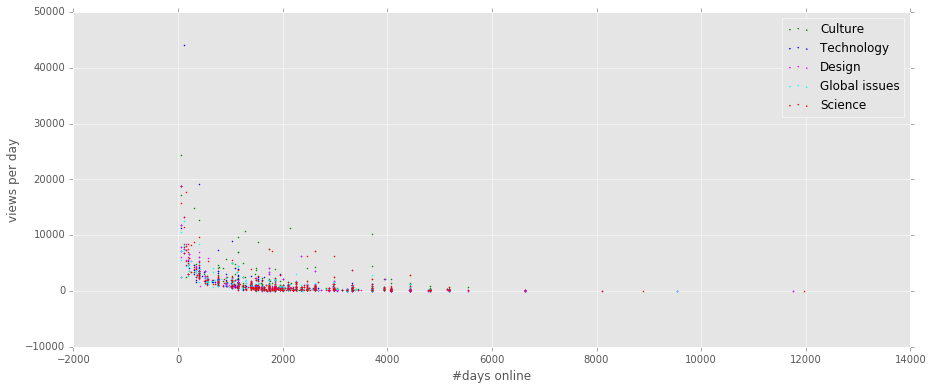

In [48]:
#Scatterplot: populariteit video's over de tijd
plt.figure(figsize=(15,6))
for topic in importantTopics:
    color = importantTopicsAndColors[topic]
    tempDF = pd.DataFrame(videosPerTopicDict[topic])
    plt.scatter(tempDF['#days online'], # x axis
                tempDF['views per day'], # y axis
                s=1, #dotsize
                label=topic, #label in legenda
                color = color)
    #plt.figure(figsize=(15,6))
plt.ylabel('views per day')
plt.xlabel('#days online')
plt.legend(loc='best')
plt.show()


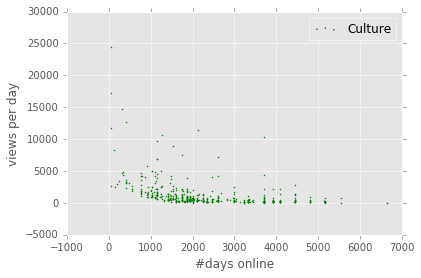

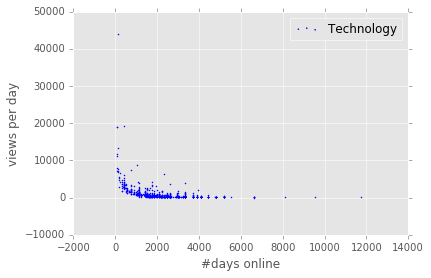

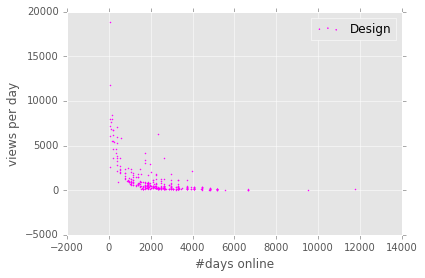

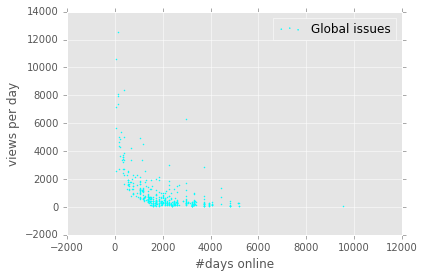

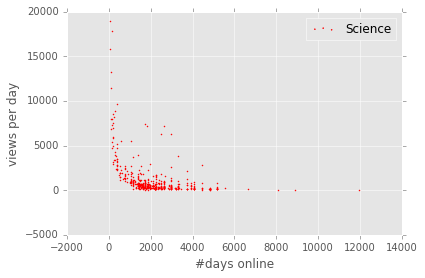

In [58]:
#Scatterplots 
import scipy
for topic in importantTopics:
    color = importantTopicsAndColors[topic]
    tempDF = pd.DataFrame(videosPerTopicDict[topic])
    plt.scatter(tempDF['#days online'], # x-axis
                tempDF['views per day'], # y-axis
                s=1, #dotsize
                label=topic, #label in legenda
                color = color)
    plt.ylabel('views per day')
    plt.xlabel('#days online')
    plt.legend(loc='best')
    plt.show()

## Overlap in thema's

<matplotlib_venn._common.VennDiagram instance at 0x0000000013B4CFC8>

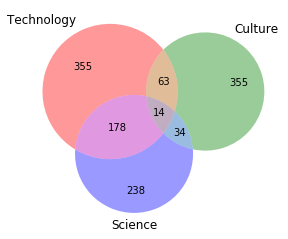

In [50]:
venn3([techset, cultset, scienceset], ('Technology', 'Culture', 'Science'))

In [51]:
#Vind titels in overlap
set.intersection(*[techset, cultset,scienceset])

{u'3 clues to understanding your brain',
 u'Averting the climate crisis',
 u'Chemical scum that dream of distant quasars',
 u"How I'm discovering the secrets of ancient texts",
 u'How juries are fooled by statistics',
 u'How technology evolves',
 u'Luke, a new prosthetic arm for soldiers',
 u'Meet e-Patient Dave',
 u'The accelerating power of technology',
 u'The brain in love',
 u'The call to learn',
 u'The design of the universe',
 u'The life code that will reshape the future',
 u'Unleash your creativity in a Fab Lab'}